In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def smooth(scalars, weight):                                    # Weight between 0 and 1
    last = scalars[0]                                           # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point     # Calculate smoothed value
        smoothed.append(smoothed_val)                           # Save it
        last = smoothed_val                                     # Anchor the last smoothed value
        
    return smoothed

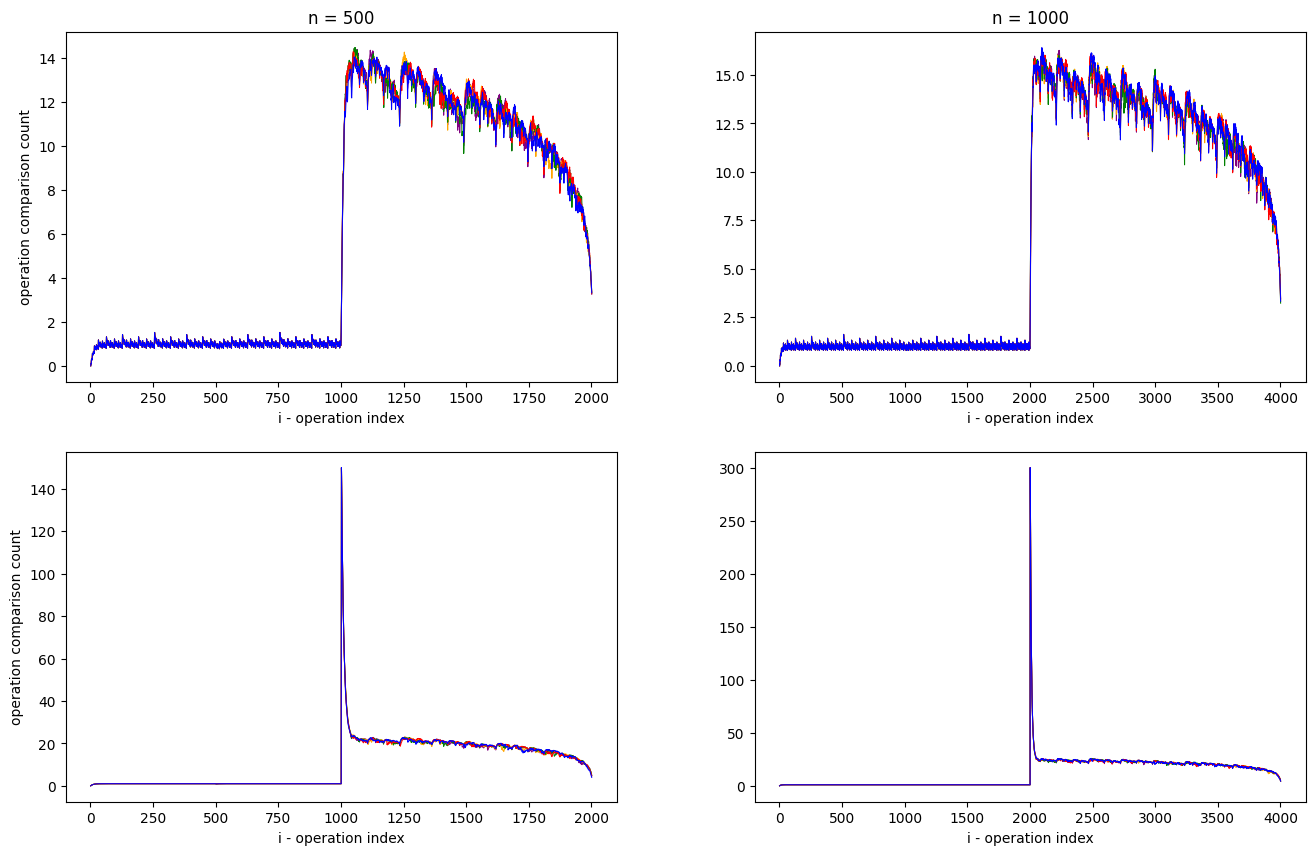

In [3]:
fig = plt.figure(figsize=(16, 10))

axs = [plt.subplot2grid((2,2), (0,0), colspan=1, rowspan=1), 
       plt.subplot2grid((2,2), (0,1), colspan=1, rowspan=1),
       plt.subplot2grid((2,2), (1,0), colspan=1, rowspan=1), 
       plt.subplot2grid((2,2), (1,1), colspan=1, rowspan=1)]

plt.subplots_adjust(hspace=0.2, wspace=0.25)
colors = ['blue', 'red', 'green', 'orange', 'purple']

axs[0].set_title('n = 500')
axs[1].set_title('n = 1000')

axs[0].set_ylabel('operation comparison count')
axs[2].set_ylabel('operation comparison count')

for ax in axs:
    ax.set_xlabel('i - operation index')

for i in range(5, 0, -1):
    df = pd.read_csv(f'data/hist/binomial_500_{i}.csv')
    axs[0].plot(df['i'], smooth(df['cmp'], 0.9), c=colors[i - 1], linewidth=0.75)

for i in range(5, 0, -1):
    df = pd.read_csv(f'data/hist/binomial_1000_{i}.csv')
    axs[1].plot(df['i'], smooth(df['cmp'], 0.9), c=colors[i - 1], linewidth=0.75)

for i in range(5, 0, -1):
    df = pd.read_csv(f'data/hist/fibonacci_500_{i}.csv')
    axs[2].plot(df['i'], smooth(df['cmp'], 0.9), c=colors[i - 1], linewidth=0.75)

for i in range(5, 0, -1):
    df = pd.read_csv(f'data/hist/fibonacci_1000_{i}.csv')
    axs[3].plot(df['i'], smooth(df['cmp'], 0.9), c=colors[i - 1], linewidth=0.75)

plt.show();

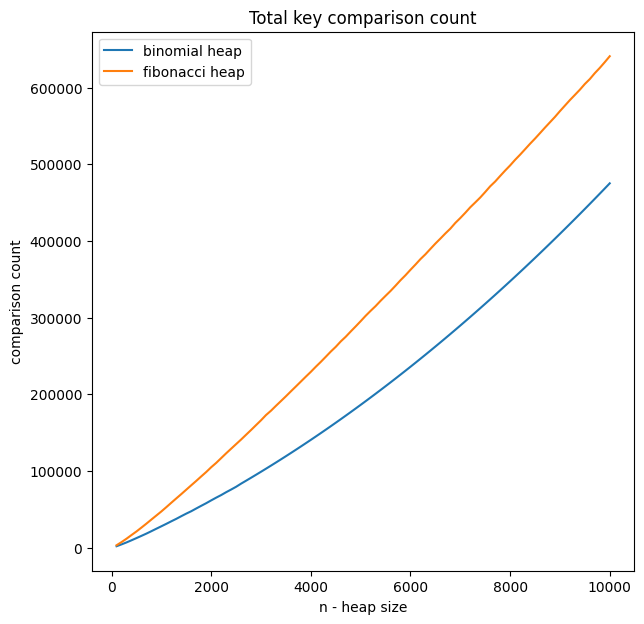

In [4]:
fig = plt.figure(figsize=(7, 7))
plt.title('Total key comparison count')
plt.xlabel('n - heap size')
plt.ylabel('comparison count')

df_bin = pd.read_csv('data/total/binomial.csv')
plt.plot(
    df_bin['n'], 
    df_bin['cmp_total'],
    label='binomial heap'
)

df_fib = pd.read_csv('data/total/fibonacci.csv')
plt.plot(
    df_fib['n'], 
    df_fib['cmp_total'],
    label='fibonacci heap'
)

plt.legend()
plt.show();